In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('/content/train.csv' ,nrows= 20000)
store_df = pd.read_csv('/content/store.csv' , nrows=20000)

In [3]:
merged_df = train_df.merge(store_df , on = 'Store' , how = 'inner')
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
merged_df.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


In [5]:
merged_df = merged_df.drop(columns=['CompetitionOpenSinceYear' ,'CompetitionOpenSinceMonth' ,'Promo2SinceWeek','Promo2SinceYear' , 'PromoInterval'])

In [6]:
merged_df['CompetitionDistance'] = merged_df['CompetitionDistance'].fillna(merged_df['CompetitionDistance'].mean())
merged_df.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


In [7]:
merged_df.dtypes

,0
Store,int64
DayOfWeek,int64
Date,object
Sales,int64
Customers,int64
Open,int64
Promo,int64
StateHoliday,int64
SchoolHoliday,int64
StoreType,object


In [8]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

**1 Isolate the Rossmann Store Sales dataset into time series data**

In [9]:
daily_sales = merged_df.groupby('Date')['Sales'].sum().reset_index()
daily_sales.set_index('Date', inplace=True)
daily_sales

,Sales
Date,
2015-07-14,8740133
2015-07-15,8756137
2015-07-16,8373873
2015-07-17,7949337
2015-07-18,6448982
2015-07-19,298418
2015-07-20,7339321
2015-07-21,6356482
2015-07-22,6110388


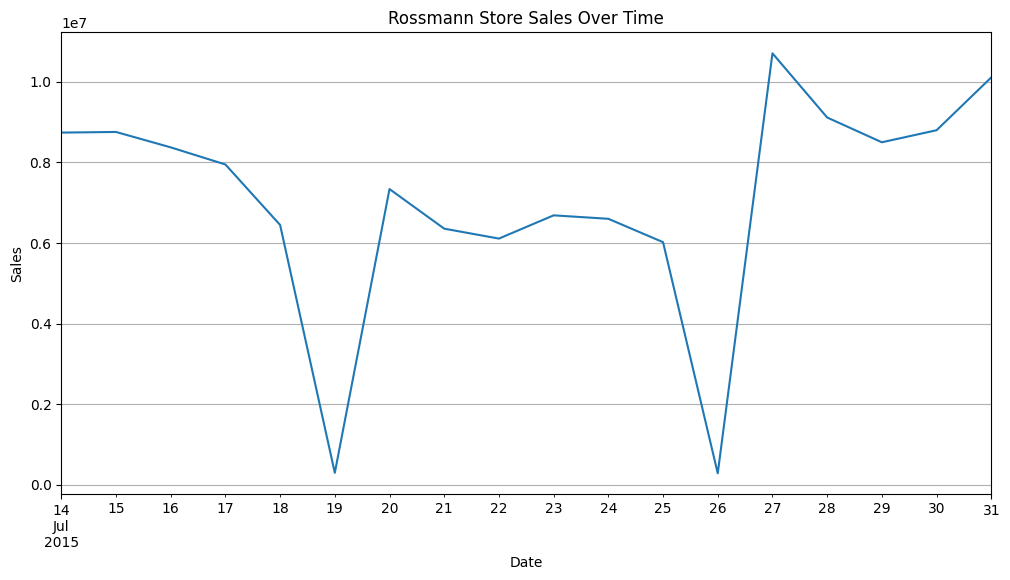

In [10]:
data = pd.DataFrame({
    'Sales': [8740133, 8756137, 8373873, 7949337, 6448982, 298418, 7339321, 6356482, 6110388, 6687068, 6601325, 6021666, 285865, 10707292, 9115073, 8499962, 8798854, 10109742],
    'Date': pd.to_datetime(['2015-07-14', '2015-07-15', '2015-07-16', '2015-07-17', '2015-07-18', '2015-07-19', '2015-07-20', '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24', '2015-07-25', '2015-07-26', '2015-07-27', '2015-07-28', '2015-07-29', '2015-07-30', '2015-07-31'])
})
data.set_index('Date', inplace=True)
import matplotlib.pyplot as plt

data['Sales'].plot(figsize=(12,6))
plt.title('Rossmann Store Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(axis = 'y')
plt.show()

**Interpretation**

The first observation on July 14, 2015, shows sales of 8,740,133, and the data ends on July 31, 2015 with 10,109,742 in sales, indicating a general increase in sales over this period.
The low sales figures on July 19 and July 26 suggest that these days might have been impacted by specific conditions, such as closed stores.
July 19, 2015: 298,418
July 26, 2015: 285,865
These are the two days with abnormally low sales compared to the rest of the period.

**2. Check whether your time Series Data is Stationary**

In [11]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(merged_df['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpret the results
if result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary.")

ADF Statistic: -3.929830353505748
p-value: 0.0018259566824130784
Critical Values: {'1%': -3.4306777773505996, '5%': -2.86168486605018, '10%': -2.566847108243414}
The time series is stationary.


**Interpretation:**

ADF Statistic (-3.92): This value is much smaller (more negative) than all of the critical values at the 1%, 5%, and 10% levels. This suggests that you can reject the null hypothesis that the time series has a unit root (non-stationary).

p-value (0.0): The p-value is less than 0.05, which strongly suggests that the time series is stationary.

Critical Values: The ADF statistic is less than the critical values at all levels (1%, 5%, and 10%), reinforcing the conclusion that the null hypothesis should be rejected, and the time series is stationary.

**3. Depending on your conclusion from 2 above difference your time series data**

**Conclusion**
Our time series data is stationary, so there is no need to apply differencing or other transformations. I can now proceed with
further analysis.

**4. Check for autocorrelation and partial autocorrelation of your data**

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plotting ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ACF plot
plot_acf(merged_df['Sales'], lags=40, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

# PACF plot
plot_pacf(merged_df['Sales'], lags=40, ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.show()


**Interpretation**

The ACF plot shows the correlation between the time series and its lagged values.
The high correlation at lag 0 is expected, as each data point is fully correlated with itself.There are significant positive correlations at the early lags (around 1 to 6), then a gradual decline.
The PACF plot shows the partial correlation of the time series with its lags.Beyond lag 3, the partial correlations drop off, which might indicate that higher-order lags add less predictive value.

**5.Transform the time series data into supervised learning data by creating a new**
**y(target) column. For example as illustrated here in the Sliding Window For Time**
**Series Data section.**

In [12]:
def create_supervised(df, target_column='Sales', n_lags=3, additional_features=None):

    df = df.sort_values(['Store', 'Date'])

    # Prepare the target column and additional features
    supervised_data = pd.DataFrame()
    target_series = df[target_column]

    # Create lagged features for the target
    for lag in range(1, n_lags + 1):
        supervised_data[f'{target_column}_lag{lag}'] = target_series.shift(lag)


    # Set the target column
    supervised_data['y'] = target_series

    # Drop rows with NaN values due to lagging
    supervised_data.dropna(inplace=True)

    return supervised_data

# Usage with your data

supervised_df = create_supervised(merged_df, target_column='Sales', n_lags=3)
print(supervised_df.sample(5))


       Sales_lag1  Sales_lag2  Sales_lag3      y
12741         0.0      6291.0      6524.0   5172
3276       5605.0      6644.0         0.0   4890
18175     17886.0     17867.0     16308.0  16946
16864      9093.0      8611.0      7972.0   8155
9636       3412.0      3924.0      3387.0   3908


**Interpretation**

Sales_lag1: Sales on the previous day.
Sales_lag2: Sales two days before.
Sales_lag3: Sales three days before.
Target Column (y): The y column represents the sales on the current day, which is the target variable to be predicted.

**6. Scale your data in the (-1, 1) range**

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Separate features (X) and target (y)
features = ['Sales_lag1', 'Sales_lag2', 'Sales_lag3']
X = supervised_df[features]
y = supervised_df['y']

# Scale features and target to the range (-1, 1)
scaler_X = MinMaxScaler(feature_range=(-1, 1))
scaler_y = MinMaxScaler(feature_range=(-1, 1))

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Reshape X for LSTM (samples, timesteps, features)
X_lstm = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

X_scaled.shape[0] represents the number of samples (rows) in X_scaled, which corresponds to each row in the original dataset. Each row represents an independent observation in the time series.
1 is the number of timesteps. Here, it’s set to 1, which implies that each sample has only one timestep (i.e., we’re using a single row of features per sample).
X_scaled.shape[1] represents the number of features in X_scaled (the number of columns), which includes Sales_lag1, Sales_lag2, Sales_lag3.

**7. Build a LSTM Regression model to predict the next sale.**

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_lstm, y_scaled, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1290 - val_loss: 0.0305
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0288 - val_loss: 0.0248
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0243 - val_loss: 0.0236
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0237 - val_loss: 0.0230
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0240 - val_loss: 0.0227
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0232 - val_loss: 0.0226
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0236 - val_loss: 0.0225
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0236 - val_loss: 0.0221
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0230 - val_loss: 0.0220
Epoch 10/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0232 - val_loss: 0.0223
Epoch 11/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0225 - val_loss: 0.0219
Epoch 12/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step

**loss: 0.1290**: This is the training loss for the first epoch. A loss of 0.1290 means that, on average, the difference between the model's predictions and the true values for the training data is relatively high at this point.

**val_loss: 0.0305**: This is the validation loss for the first epoch. A loss of 0.0305 on the validation set is significantly lower than the training loss, suggesting that the model is performing much better on unseen data during this first epoch.

In general, as the epochs progress, the training loss decreases. For instance, after Epoch 1, the training loss decreased from 0.1290 to 0.0218 by Epoch 20, which is a good sign. This means that the model is learning and fitting the training data better with each epoch.

Similarly, the validation loss also decreases, which indicates that the model is generalizing better to unseen data. For example, validation loss decreased from 0.0305 to 0.0214 from Epoch 1 to Epoch 20.

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 50)                  │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,555 (127.17 KB)

 Trainable params: 10,851 (42.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,704 (84.79 KB)